<a href="https://colab.research.google.com/github/DimasWerito/Math_01/blob/main/%D0%94%D0%97_10_%D0%9A%D1%80%D0%B0%D1%81%D1%96%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%9A%D0%BE%D1%81%D1%82%D1%8F%D0%BD%D1%82%D0%B8%D0%BD%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit?usp=sharing'
url = url[:url.find('/edit')] + '/export?format=csv'
df = pd.read_csv(url)


In [17]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,4.0,10.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,5.0,12.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,0.5,8.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,5.5,11.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,4.0,12.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    int64  
 3   Bedtime                 452 non-null    float64
 4   Wakeup time             452 non-null    float64
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    int64  
 14  Exercise frequency      452 non-null    fl

In [8]:
df.isna().mean()

ID                        0.0
Age                       0.0
Gender                    0.0
Bedtime                   0.0
Wakeup time               0.0
Sleep duration            0.0
Sleep efficiency          0.0
REM sleep percentage      0.0
Deep sleep percentage     0.0
Light sleep percentage    0.0
Awakenings                0.0
Caffeine consumption      0.0
Alcohol consumption       0.0
Smoking status            0.0
Exercise frequency        0.0
dtype: float64

In [7]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].mean())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mean())

In [9]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df['Smoking status'] = df['Smoking status'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [12]:
df['Bedtime'] = df['Bedtime'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))

In [14]:
df['Bedtime'] = df['Bedtime'].apply(lambda x: (x - 21) % 24)

In [16]:
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: (x - 21) % 24)

In [22]:
df.drop(columns=['ID'],inplace=True)

In [23]:
df.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,2.636062,10.101770,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,0.340708,1.791480
std,13.172250,0.500534,1.687559,1.955899,0.866625,0.135237,3.525963,15.654235,15.313665,1.326338,29.353745,1.596013,0.474472,1.418603
min,9.000000,0.000000,0.000000,6.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,8.500000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,3.000000,10.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,23.653396,0.000000,0.000000,2.000000
75%,52.000000,1.000000,4.000000,12.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,5.500000,15.500000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


<Axes: >

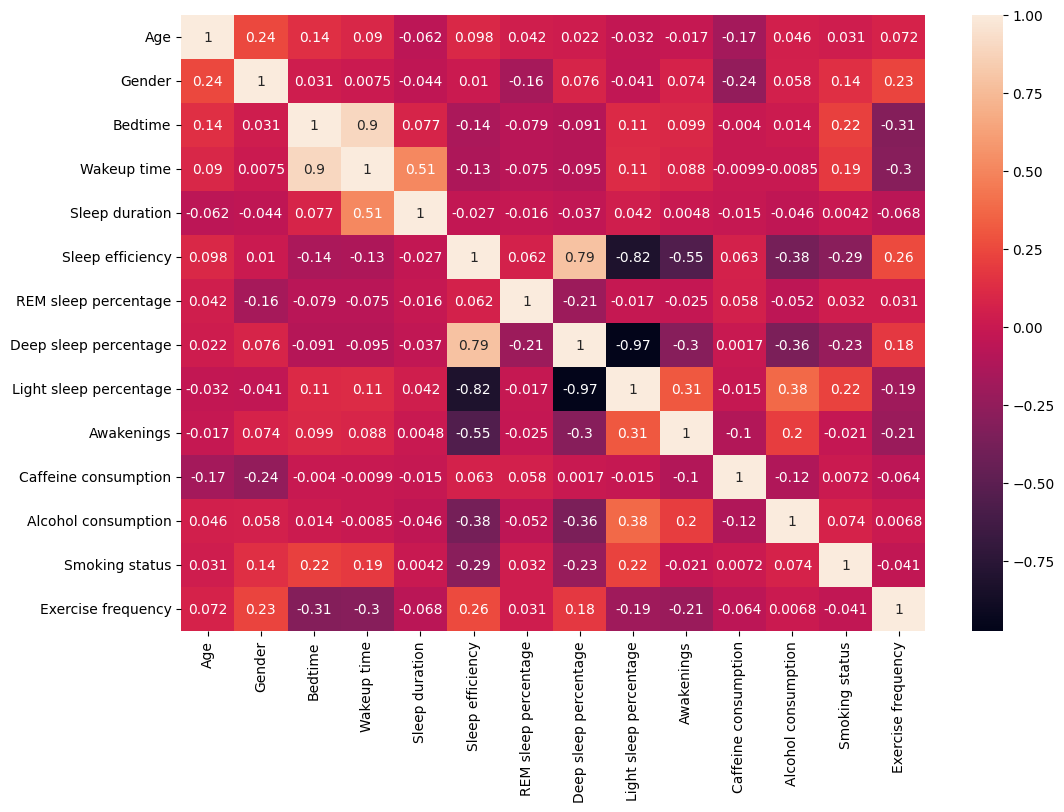

In [24]:
fig, ax = plt.subplots(figsize=(12,  8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [25]:
from sklearn.model_selection import train_test_split
target = 'Sleep efficiency'
X = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [37]:
model = GradientBoostingRegressor()

model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [38]:
print('Train')
print(f'MSE: {mean_squared_error(y_train, pred_train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train, pred_train)}')
print(f'RSQ: {r2_score(y_train, pred_train)}')

print('Test')
print(f'MSE: {mean_squared_error(y_test, pred_test)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, pred_test)}')
print(f'RSQ: {r2_score(y_test, pred_test)}')

Train
MSE: 0.0010564575476404935
MAPE: 0.03227454604793926
RSQ: 0.9432055089292353
Test
MSE: 0.0019881040901148506
MAPE: 0.04395319327776382
RSQ: 0.8791636759759827


<Axes: xlabel='Sleep efficiency'>

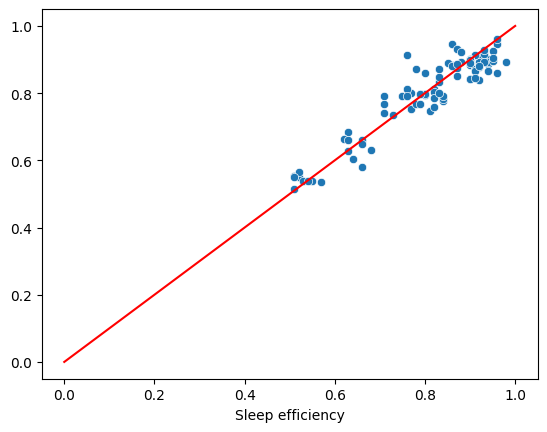

In [39]:
sns.scatterplot(x=y_test, y=pred_test)
sns.lineplot(x=[0, 1], y=[0, 1], color='red')

<Axes: xlabel='Sleep efficiency', ylabel='Sleep efficiency'>

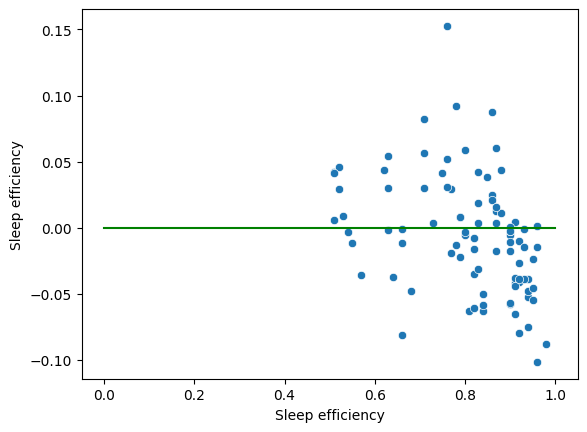

In [40]:
sns.scatterplot(x=y_test, y=pred_test-y_test)
sns.lineplot(x=[0, 1], y=[0, 0], color='green')

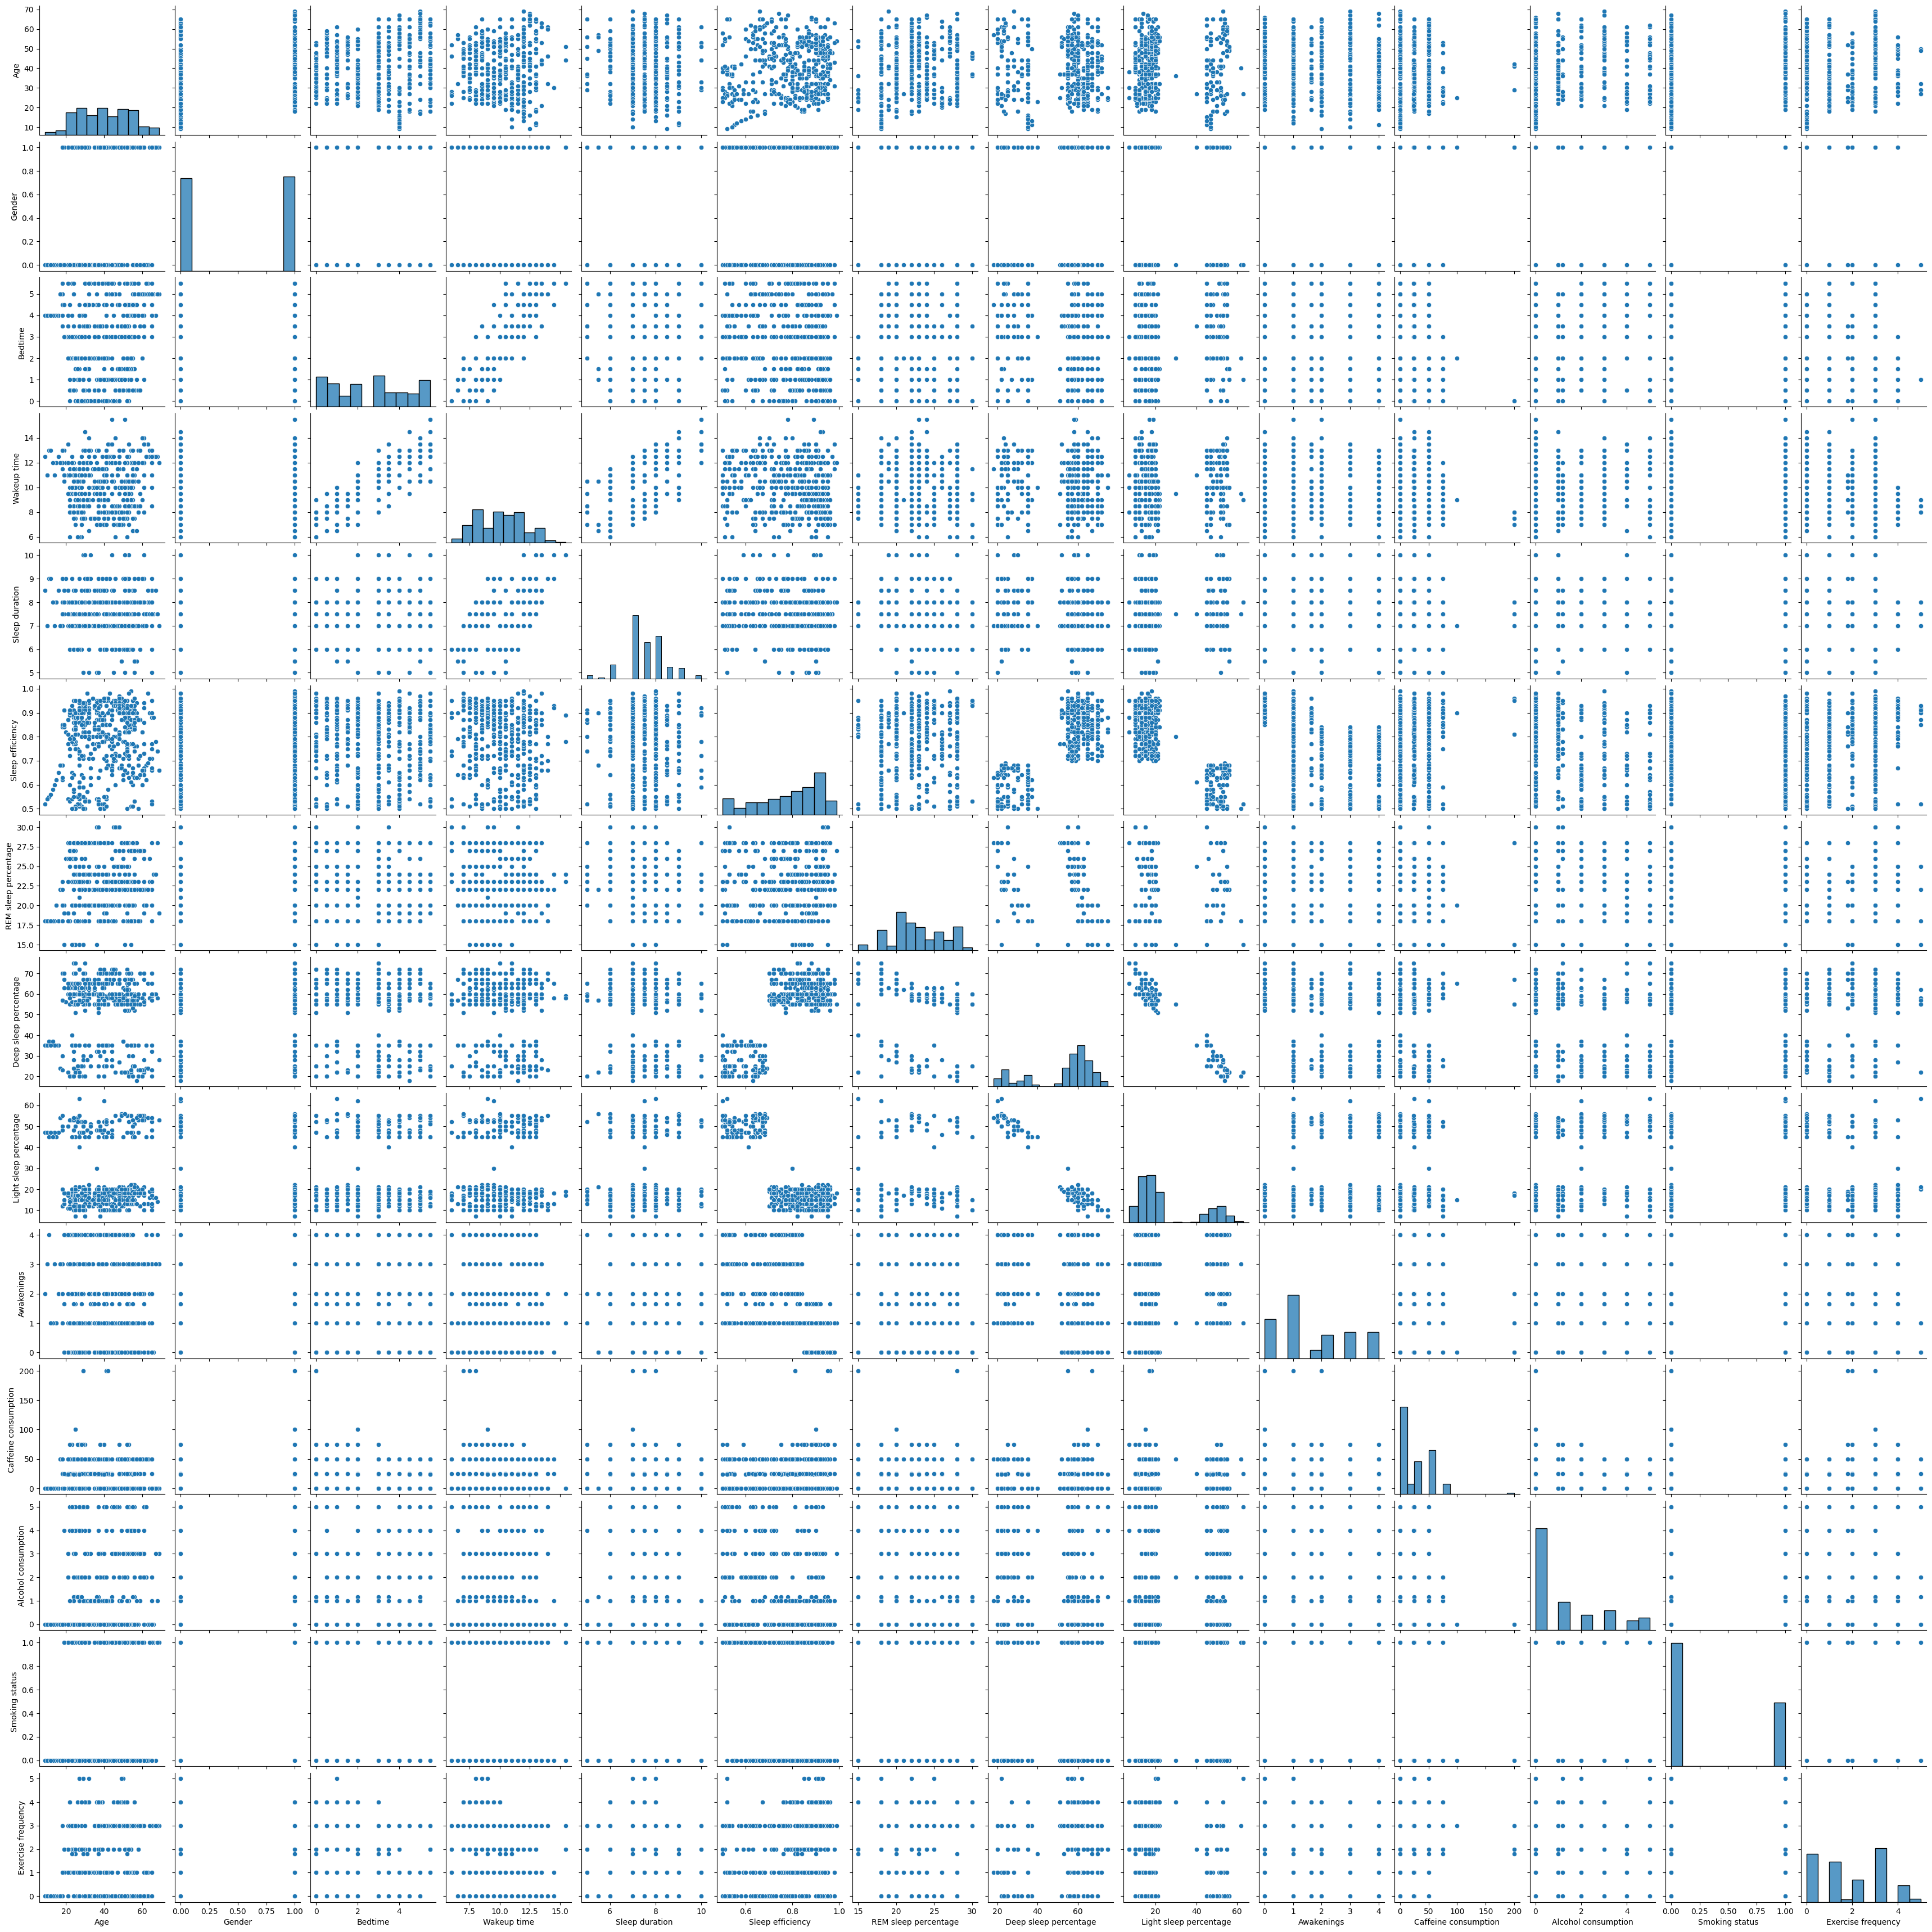

In [41]:
sns.pairplot(df)